In [1]:
import blackhc.notebook

Appended C:\Users\black\PycharmProjects\idao\src to paths
Switched to directory C:\Users\black\PycharmProjects\idao


In [2]:
import pandas as pd

In [30]:
train_df = pd.read_hdf('./data/processed/train.hdf', key='data')

## Sort all data by user, id3, date

In [34]:
train_sorted_df = train_df.sort_values(['user_id', 'id3', 'date'])

In [35]:
train_sorted_df.to_hdf('./data/processed/train_sorted.hdf', key='data', complevel=1, complib='zlib')

In [37]:
grouped_by = train_sorted_df.groupby(['user_id', 'id3'])

## Can we dump all products that only appear once?

In [63]:
train_sorted_df.set_index(['user_id', 'id3'], inplace=True)

In [66]:
more_than_once = train_sorted_df.groupby(level=['user_id', 'id3']).size() > 1

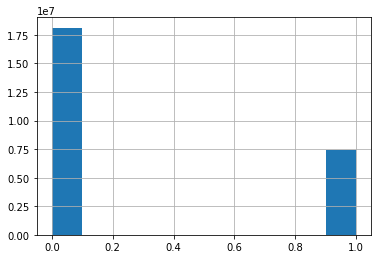

In [71]:
%matplotlib inline
more_than_once.hist()

`more_than_once` contains an entry for every unique user_id/id3 pair.
`train_sorted_df` contains an entry for every unique user_id/id3/date triple.

In [75]:
more_than_once_dates = train_sorted_df[more_than_once]

c:\program files\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [77]:
more_than_once_dates['prev_date'] = more_than_once_dates.groupby(['user_id', 'id3'])['date'].transform('shift')

c:\program files\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
more_than_once_dates_droppedna = more_than_once_dates.dropna()

In [84]:
more_than_once_dates_droppedna['frequency'] = more_than_once_dates_droppedna['date'] - more_than_once_dates_droppedna['prev_date']

c:\program files\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
frequency = more_than_once_dates_droppedna.drop(labels=['id2', 'date','id1', 'prev_date'], axis=1)

In [175]:
frequency_by_week = frequency.reset_index().groupby(['id3', 'frequency']).sum().drop(labels='user_id', axis=1).groupby('id3')['count'].rolling(7).sum()

In [194]:
frequency_by_week = frequency_by_week.reset_index(0).drop('id3', axis=1)

In [195]:
frequency_by_week

count
id3 frequency        
0   1.0           NaN
    2.0           NaN
    3.0           NaN
    4.0           NaN
    5.0           NaN
    6.0           NaN
    7.0        9911.0
    8.0        5709.0
    9.0        4423.0
    10.0       3656.0
    11.0       3151.0
    12.0       2703.0
    13.0       2400.0
    14.0       2075.0
    15.0       1834.0
    16.0       1646.0
    17.0       1486.0
    18.0       1380.0
    19.0       1244.0
    20.0       1106.0
    21.0       1016.0
    22.0        918.0
    23.0        851.0
    24.0        778.0
    25.0        700.0
    26.0        643.0
    27.0        561.0
    28.0        496.0
    29.0        457.0
    30.0        404.0
...               ...
930 9.0         470.0
    10.0        344.0
    11.0        284.0
    12.0        219.0
    13.0        173.0
    14.0        143.0
    15.0        117.0
    16.0         93.0
    17.0         76.0
    18.0         69.0
    19.0         57.0
    20.0         52.0
    21.0         51.0
    22.0         48.0
    23.0         49.0
    24.0         49.0
    25.0         41.0
    26.0         39.0
    27.0         36.0
    28.0         30.0
    30.0         25.0
    31.0         22.0
    32.0         21.0
    34.0         20.0
    35.0         19.0
    37.0         16.0
    39.0         14.0
    41.0         13.0
    46.0         12.0
    47.0         12.0

[39396 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001694AD9C908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001694AFE7748>]], dtype=object)

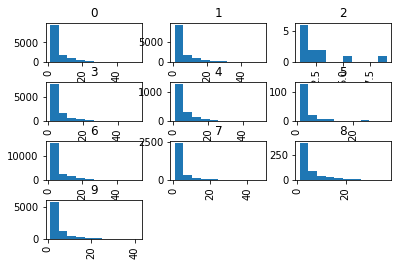

In [159]:
# Using hist for the histogram
frequency_noindex = frequency.reset_index()
frequency_noindex[frequency_noindex['id3'] < 10].hist(by='id3', column='frequency')

In [104]:
# TODO: we can use hist directly on frequncy with columns = frequency...!
frequency['count'] = 1
frequency_counts = frequency.groupby(['id3', 'frequency']).count()

In [124]:
example = frequency_counts[frequency_counts.groupby('id3').sum() > 10000].dropna()

In [151]:
example_noindex = example.reset_index()

id3
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

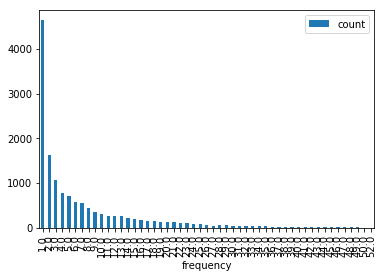

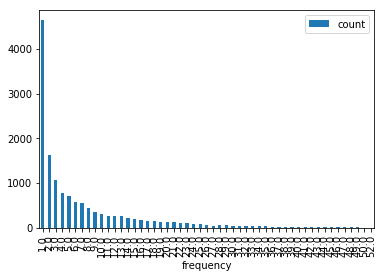

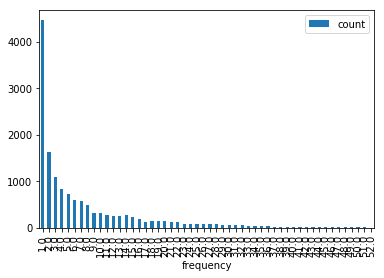

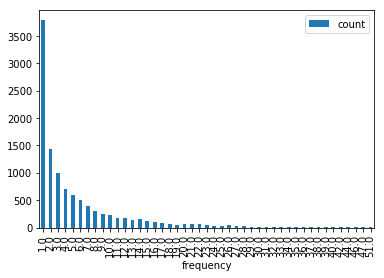

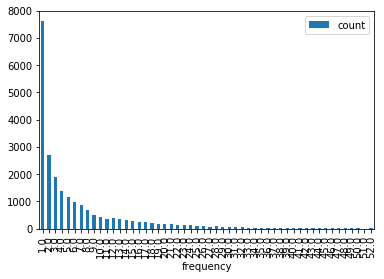

In [156]:
example_noindex[example_noindex['id3'] < 10].groupby('id3').plot.bar(x='frequency', y='count')

## Can we visualize the frequencies a given product is bought at?

## Sampling 10% of the data

In [30]:
train_df = pd.read_hdf('./data/processed/train.hdf', key='data')

In [5]:
train_df.describe()

,id3,user_id,id2,date,id1
count,4.699683e+07,4.699683e+07,4.699683e+07,4.699683e+07,4.699683e+07
mean,4.699554e+02,5.880101e+05,5.276736e+01,2.457278e+01,8.352930e+00
std,2.633716e+02,3.406649e+05,3.657678e+01,1.406095e+01,3.235313e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.260000e+02,2.928090e+05,1.500000e+01,1.300000e+01,7.000000e+00
50%,5.090000e+02,5.867210e+05,4.900000e+01,2.400000e+01,9.000000e+00
75%,6.730000e+02,8.835830e+05,8.700000e+01,3.500000e+01,1.000000e+01
max,9.300000e+02,1.179571e+06,1.210000e+02,5.400000e+01,1.500000e+01


In [6]:
train_10p_df = train_df.sample(frac=0.1)

In [11]:
train_10p_df.to_hdf('./data/processed/train_10p.hdf', key='data', complevel=1, complib='zlib')

In [15]:
del train_10p_df

In [16]:
del train_df

## Exploration of the data
(Either the full sample, or a sample, or dummy data)

In [14]:
df = pd.read_hdf('./data/processed/train_10p.hdf', key='data')

In [18]:
df.sort_values(['user_id','id3', 'date'], inplace=True)

In [28]:
df

,id3,user_id,id2,date,id1
22355498,51,0,14,22,10
22240632,134,0,14,22,10
21996857,271,0,106,22,4
21403452,283,0,85,22,7
21537403,310,0,109,22,9
32052457,581,0,14,32,10
18282334,610,1,12,19,9
45675064,610,1,12,52,9
14317738,109,3,92,15,10
14159808,171,3,19,15,8
